# Lottery probabilities

We will focus on the 6/49 lottery (Lotto) and build functions to answer the following questions:

* What is the probability of winning the big prize with a single or more tickets ticket?
* What is the probability of having exactly five (or four, or three, or two) winning numbers on a single ticket?
* What is the probability of having at least five (or four, or three, or two) winning numbers on a single ticket?
* Are some numbers more likely to appear based on historical data? 

We will collect historical data coming from the national 6/49 lottery game in Canada, with drawings dating from 1982 to 2018 to answer some more questions later.

In order to find the probabilities we want, we will write 2 functions:
* A function that calculates factorials.
* A function that calculates combinations.

In [1]:

def factorial(number):
    f=1
    for x in range(1, (number+1)):
        f = x*f
    return f


def combinations(n,k):
    c = factorial(n)/(factorial(k)*factorial(n-k))
    return c
    


To answer our question "What is the probability of winning the big prize with a single ticket?" we will write a function named one_ticket_probability. It will take in a list of six unique numbers and print the probability of winning.

In [2]:
def one_ticket_probability(lis):
    pa = combinations(49,6)
    pr = 1/pa
    perc = pr*100
    print('Your chances to win with the numbers {} are {:.6f}%.\nThis means, you have a 1 in {:,} chances to win.'.format(lis, perc, int(pa)))

In [3]:
one_ticket_probability([2,3,4,5,6,7])

Your chances to win with the numbers [2, 3, 4, 5, 6, 7] are 0.000007%.
This means, you have a 1 in 13,983,816 chances to win.


Next, we will also be able to compare our ticket against the historical lottery data in Canada and determine whether we would have ever won by now.
The data set can be downloaded from Kaggle [here]('https://www.kaggle.com/datascienceai/lottery-dataset'):

In [4]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [5]:
data = pd.read_csv('https://raw.githubusercontent.com/AngelosTheodorakis/Data_Analysis_Projects/master/Lotto%20Probabilities/Lotto_Canada.csv')

In [6]:
data.shape

(3665, 11)

In [7]:
data.head(3)

,PRODUCT,DRAW NUMBER,SEQUENCE NUMBER,DRAW DATE,NUMBER DRAWN 1,NUMBER DRAWN 2,NUMBER DRAWN 3,NUMBER DRAWN 4,NUMBER DRAWN 5,NUMBER DRAWN 6,BONUS NUMBER
0,649,1,0,6/12/1982,3,11,12,14,41,43,13
1,649,2,0,6/19/1982,8,33,36,37,39,41,9
2,649,3,0,6/26/1982,1,6,23,24,27,39,34


In [8]:
data.tail(3)

,PRODUCT,DRAW NUMBER,SEQUENCE NUMBER,DRAW DATE,NUMBER DRAWN 1,NUMBER DRAWN 2,NUMBER DRAWN 3,NUMBER DRAWN 4,NUMBER DRAWN 5,NUMBER DRAWN 6,BONUS NUMBER
3662,649,3589,0,6/13/2018,6,22,24,31,32,34,16
3663,649,3590,0,6/16/2018,2,15,21,31,38,49,8
3664,649,3591,0,6/20/2018,14,24,31,35,37,48,17


We want to write a function that prints:
* The number of times the combination selected occurred in the Canada data set.
* The probability of winning the big prize in the next drawing with that combination.
<br> 
<br>In order to do this, we want to first make a function, that will extract all the numbers of a drawing. The function will be called *extract numbers*. We will save the results in a dictionary called winning numbers.

In [9]:
def extract_numbers(row):
    l=[]
    for x in range(1,7):
        d = data['NUMBER DRAWN {}'.format(x)].iloc[row]
        l.append(d)
        
    return l
    

In [10]:
winning_numbers = {}
for x in range(0,len(data)):
    extract_numbers(x)
    winning_numbers[x] = extract_numbers(x)


In [11]:
for x in range(3):
    print(winning_numbers[x]) # test our function

[3, 11, 12, 14, 41, 43]
[8, 33, 36, 37, 39, 41]
[1, 6, 23, 24, 27, 39]


The following function takes in two inputs: a list containing numbers from a user and a Series containing sets with the winning numbers.

In [12]:
def check_historical_occurrence(l, w = winning_numbers):
    win = []
    for x in range(0,len(data)):
        check = (set(winning_numbers[x]) == set(l)) # Boolean
        win.append(check)
    if sum(win) == 0:
        print('The combination {} has never occured.'.format(l))
        
    else:
        print('The number of times combination {} has occured in the past is {}.'.format(l, sum(win)))
    

In [13]:
test_input_1 = [36, 33, 37, 39, 8, 41]
check_historical_occurrence(test_input_1)

The number of times combination [36, 33, 37, 39, 8, 41] has occured in the past is 1.


In [14]:
test_input_2 = [3, 4, 6, 22, 10, 44]
check_historical_occurrence(test_input_2)

The combination [3, 4, 6, 22, 10, 44] has never occured.


In [15]:
test_input_3 = [39,37,36,8,41,33]
check_historical_occurrence(test_input_3)

The number of times combination [39, 37, 36, 8, 41, 33] has occured in the past is 1.


It will be interesting to see how many occurences each number had over the years, in Canada lottery. We will put all the numbers from the drawings in a single list and then we will count how many times these numbers occured.

In [16]:
winning_numbers_list = []
for x in range(3665):
    winning_numbers_list.append(winning_numbers[x])

In [17]:
from itertools import chain
winning_numbers_list = list(chain.from_iterable(winning_numbers_list))

In [18]:
len(winning_numbers_list) == len(data)*6 # check our list length

True

The following dictionary will have each number as an index followed by the number of times this number occured over the years:

In [19]:
occurances = {}
for x in range(1,50):
    occurances[x] = (winning_numbers_list.count(x))

Let's find the maximum and minimum occurences of a number and plot all the occurences.

In [20]:
print(max(occurances, key=occurances.get))
print(occurances[max(occurances, key=occurances.get)])

31
499


In [21]:
print(min(occurances, key=occurances.get))
print(occurances[min(occurances, key=occurances.get)])

14
402


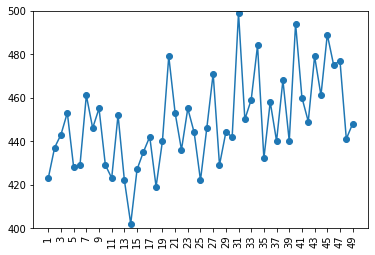

In [22]:
import matplotlib.pylab as plt

lists = occurances.items() # return a list of tuples
x, y = zip(*lists) # unpack a list of pairs into two tuples

plt.plot(x, y, marker="o")
plt.ylim(400,500)
plt.xticks(range(1,50,2),rotation=90)
plt.show()

It is interesting to see that number 14 has minimum (402) and number 31 has maximum occurances (499). <br>This is almost 100 more occurances!<br>
Now let's sort the numbers by their frequency:

In [23]:
occurances_sorted_keys = sorted(occurances, key=occurances.get, reverse=True)
for r in occurances_sorted_keys:
    print(r, occurances[r])
    


31 499
40 494
45 489
34 484
20 479
43 479
47 477
46 475
27 471
38 468
7 461
44 461
41 460
33 459
36 458
9 455
23 455
4 453
21 453
12 452
32 450
42 449
49 448
8 446
26 446
24 444
29 444
3 443
17 442
30 442
48 441
19 440
37 440
39 440
2 437
22 436
16 435
35 432
6 429
10 429
28 429
5 428
15 427
1 423
11 423
13 422
25 422
18 419
14 402


We will take the top 6 numbers with most occurances and play with these numbers to see what happens.

In [24]:
occurances_sorted_keys[:6]

[31, 40, 45, 34, 20, 43]

In [25]:
test_input_most_occurances = [31, 40, 45, 34, 20, 43]
check_historical_occurrence(test_input_most_occurances)

The combination [31, 40, 45, 34, 20, 43] has never occured.


So even knowing which numbers are the most common, their combination never occured.

The following function will allow users to calculate the probability of winning for any number of different tickets.

In [26]:
def multi_ticket_probability(x):
    possible_outcomes = combinations(49,6)
    probability = x/possible_outcomes
    percentage = probability*100
    combinations_rounded = round(possible_outcomes / x)
    print('Your probability of winning with {:,} tickets is {:.6f}%.\nThis means that you have 1 in {:,} chances of winning!'.format(int(x),percentage,combinations_rounded))
    

In [27]:
multi_ticket_probability(100)

Your probability of winning with 100 tickets is 0.000715%.
This means that you have 1 in 139,838 chances of winning!


In [28]:
test_inputs = [1, 10, 100, 10000, 1000000, 13983816/2, 13983816]

for test_input in test_inputs:
    multi_ticket_probability(test_input)
    print('-------------------------------------------------------------') # output delimiter

Your probability of winning with 1 tickets is 0.000007%.
This means that you have 1 in 13,983,816 chances of winning!
-------------------------------------------------------------
Your probability of winning with 10 tickets is 0.000072%.
This means that you have 1 in 1,398,382 chances of winning!
-------------------------------------------------------------
Your probability of winning with 100 tickets is 0.000715%.
This means that you have 1 in 139,838 chances of winning!
-------------------------------------------------------------
Your probability of winning with 10,000 tickets is 0.071511%.
This means that you have 1 in 1,398 chances of winning!
-------------------------------------------------------------
Your probability of winning with 1,000,000 tickets is 7.151124%.
This means that you have 1 in 14 chances of winning!
-------------------------------------------------------------
Your probability of winning with 6,991,908 tickets is 50.000000%.
This means that you have 1 in 2 cha

Finally, we're going to write one more function to calculate probabilities for exactly two, three, four, or five winning numbers.

In [29]:
def probability_less_6(n_winning_numbers):
    
    n_combinations_ticket = combinations(6, n_winning_numbers) 
    n_combinations_remaining = combinations(43, 6 - n_winning_numbers)
    successful_outcomes = n_combinations_ticket * n_combinations_remaining
    
    n_combinations_total = combinations(49, 6)    
    probability = successful_outcomes / n_combinations_total
    
    probability_percentage = probability * 100    
    combinations_simplified = round(n_combinations_total/successful_outcomes)    
    print('''Your chances of having {} winning numbers with this ticket are {:.6f}%.
In other words, you have a 1 in {:,} chances to win.'''.format(n_winning_numbers, probability_percentage,
                                                               int(combinations_simplified)))

In [30]:
for x in range(2,6):
    probability_less_6(x)
    print('-------------------------------------------------------------') # output delimiter   

Your chances of having 2 winning numbers with this ticket are 13.237803%.
In other words, you have a 1 in 8 chances to win.
-------------------------------------------------------------
Your chances of having 3 winning numbers with this ticket are 1.765040%.
In other words, you have a 1 in 57 chances to win.
-------------------------------------------------------------
Your chances of having 4 winning numbers with this ticket are 0.096862%.
In other words, you have a 1 in 1,032 chances to win.
-------------------------------------------------------------
Your chances of having 5 winning numbers with this ticket are 0.001845%.
In other words, you have a 1 in 54,201 chances to win.
-------------------------------------------------------------


We can also calculate the probability of having **at least** two,three,four,or five numbers. We will alter the previous function to return just the probability and then sum the probabilities in another function.

In [31]:
def probability_exactly(n_winning_numbers):
    
    n_combinations_ticket = combinations(6, n_winning_numbers) 
    n_combinations_remaining = combinations(43, 6 - n_winning_numbers)
    successful_outcomes = n_combinations_ticket * n_combinations_remaining
    
    n_combinations_total = combinations(49, 6)    
    probability = successful_outcomes / n_combinations_total
    
    probability_percentage = probability * 100    
    combinations_simplified = round(n_combinations_total/successful_outcomes)    
    return  probability

def probability_least(n_winning_numbers):
    prob = 0
    for x in range(n_winning_numbers,7):
        prob = prob + probability_exactly(x)
    prob_per = prob * 100
    print('Your chances of having at least {} winning numbers are {:.7f}%'.format(n_winning_numbers, prob_per))

In [32]:
for x in range(2,6):
    probability_least(x)
    print('-------------------------------------------------------------') # output delimiter

Your chances of having at least 2 winning numbers are 15.1015574%
-------------------------------------------------------------
Your chances of having at least 3 winning numbers are 1.8637545%
-------------------------------------------------------------
Your chances of having at least 4 winning numbers are 0.0987141%
-------------------------------------------------------------
Your chances of having at least 5 winning numbers are 0.0018521%
-------------------------------------------------------------


# Summary

We have succesfully answered the following questions:
* What is the probability of winning the big prize with a single or more tickets ticket?
* What is the probability of having exactly five (or four, or three, or two) winning numbers on a single ticket?
* What is the probability of having at least five (or four, or three, or two) winning numbers on a single ticket?
* Are some numbers more likely to appear based on historical data? 